<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/MelaTerzoEsperimentoGraficiATorta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Relevance'

relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfr = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

sort = 'Date'

date = '1Pb2It9WPid9Irjp6bRVgCF7B3Y5ARBjT'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': date})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

dfd = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [2]:
#elimimo i non riconosciuti
dfr = dfr[(dfr['age'] != 'Not recognized')]
#converto l'eta in numero
dfr['age'] = pd.to_numeric(dfr['age'], errors='coerce').fillna(0).astype(np.int64)
dfr = dfr[(dfr['age']!= 0 )]

#elimimo i non riconosciuti
dfd = dfd[((dfd['age'] != 'Not recognized'))]
#converto l'età in nuemro
dfd['age'] = pd.to_numeric(dfd['age'], errors='coerce').fillna(0).astype(np.int64)
dfr = dfr[(dfr['age']!= 0 )]

In [3]:
dfr = dfr[(dfr['number']<=20)]
undertrenta_relevance = len(dfr[(dfr['age']<=30) & (dfr['number']<=20)]) 
trentaquaranta_relevance = len(dfr[(dfr['age']>30) & (dfr['age']<40) & (dfr['number']<=20)])
quarantacinquanta_relevance = len(dfr[(dfr['age']>=40) & (dfr['age']<55) & (dfr['number']<=20)]) 
overcinquanta_relevance = len(dfr[(dfr['age']>=55) & (dfr['number']<=20)])


dfd = dfd[(dfd['number']<=20)]
undertrenta_data = len(dfd[(dfd['age']<=30) & (dfd['number']<=20)]) 
trentaquaranta_data = len(dfd[(dfd['age']>30) & (dfd['age']<40) & (dfd['number']<=20)])
quarantacinquanta_data = len(dfd[(dfd['age']>=40) & (dfd['age']<55) & (dfd['number']<=20)]) 
overcinquanta_data = len(dfd[(dfd['age']>=55) & (dfd['number']<=20)])

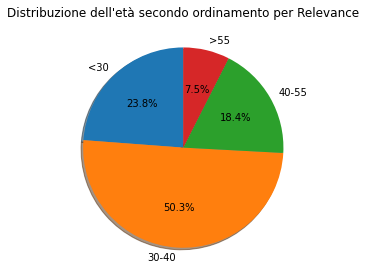

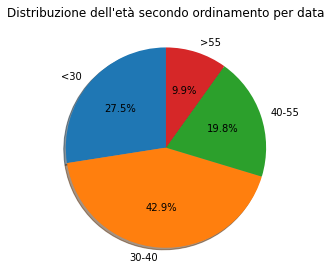

In [4]:
labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_relevance, trentaquaranta_relevance, quarantacinquanta_relevance, overcinquanta_relevance] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età secondo ordinamento per Relevance")
fig.tight_layout()

labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_data, trentaquaranta_data, quarantacinquanta_data, overcinquanta_data] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età secondo ordinamento per data")
fig.tight_layout()

In [6]:
dfrA = dfr[(dfr['number']<=20) & (dfr['typology']=='American')]
undertrenta_relevance = len(dfrA[(dfrA['age']<=30) & (dfrA['number']<=20)]) 
trentaquaranta_relevance = len(dfrA[(dfrA['age']>30) & (dfrA['age']<40) & (dfrA['number']<=20)])
quarantacinquanta_relevance = len(dfrA[(dfrA['age']>=40) & (dfrA['age']<55) & (dfrA['number']<=20)]) 
overcinquanta_relevance = len(dfrA[(dfrA['age']>=55) & (dfrA['number']<=20)])


dfdA = dfd[(dfd['number']<=20) & (dfd['typology']=='American')]
undertrenta_data = len(dfdA[(dfdA['age']<=30) & (dfdA['number']<=20)]) 
trentaquaranta_data = len(dfdA[(dfdA['age']>30) & (dfdA['age']<40) & (dfdA['number']<=20)])
quarantacinquanta_data = len(dfdA[(dfdA['age']>=40) & (dfdA['age']<55) & (dfdA['number']<=20)]) 
overcinquanta_data = len(dfdA[(dfdA['age']>=55) & (dfdA['number']<=20)])

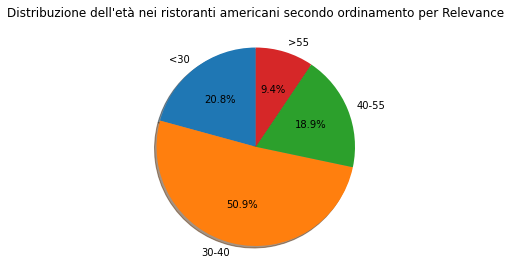

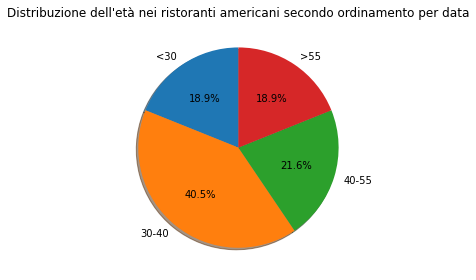

In [7]:
labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_relevance, trentaquaranta_relevance, quarantacinquanta_relevance, overcinquanta_relevance] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età nei ristoranti americani secondo ordinamento per Relevance")
fig.tight_layout()

labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_data, trentaquaranta_data, quarantacinquanta_data, overcinquanta_data] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età nei ristoranti americani secondo ordinamento per data")
fig.tight_layout()

In [8]:
dfrJ = dfr[(dfr['number']<=20) & (dfr['typology']=='Japanese')]
undertrenta_relevance = len(dfrJ[(dfr['age']<=30) & (dfrJ['number']<=20)]) 
trentaquaranta_relevance = len(dfrJ[(dfrJ['age']>30) & (dfrJ['age']<40) & (dfrJ['number']<=20)])
quarantacinquanta_relevance = len(dfrJ[(dfrJ['age']>=40) & (dfrJ['age']<55) & (dfrJ['number']<=20)]) 
overcinquanta_relevance = len(dfrJ[(dfrJ['age']>=55) & (dfrJ['number']<=20)])

dfdJ = dfd[(dfd['number']<=20) & (dfd['typology']=='Japanese')]
undertrenta_data = len(dfdJ[(dfdJ['age']<=30) & (dfdJ['number']<=20)]) 
trentaquaranta_data = len(dfdJ[(dfdJ['age']>30) & (dfdJ['age']<40) & (dfdJ['number']<=20)])
quarantacinquanta_data = len(dfdJ[(dfdJ['age']>=40) & (dfdJ['age']<55) & (dfdJ['number']<=20)]) 
overcinquanta_data = len(dfdJ[(dfdJ['age']>=55) & (dfdJ['number']<=20)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


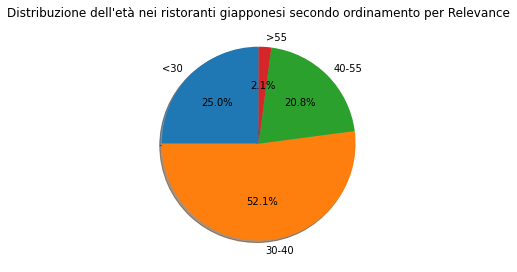

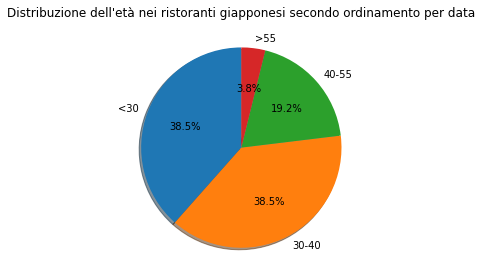

In [9]:
labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_relevance, trentaquaranta_relevance, quarantacinquanta_relevance, overcinquanta_relevance] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età nei ristoranti giapponesi secondo ordinamento per Relevance")
fig.tight_layout()

labels = ['<30', '30-40', '40-55', '>55']
sizes = [undertrenta_data, trentaquaranta_data, quarantacinquanta_data, overcinquanta_data] 
explode = [0, 0, 0, 0]
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Distribuzione dell'età nei ristoranti giapponesi secondo ordinamento per data")
fig.tight_layout()